<a href="https://colab.research.google.com/github/danielahernandz/Series-de-tiempo-avanzado/blob/main/Estacionariedad_nalidad_descompo_het.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ESTACIONARIEDAD - Prueba Dickey-Fuller:

Metodo para verificar si un conjunto de datos proviene de un proceso estacionario o no, conocida D-F




Más adelante se desarolllo una versión actualizada de la prueba para tener en cuenta la dependencia de los datos con respecto al tiempo.


La prueba está basada en un contraste de hipótesis que forma parte de la base estadistica que tenemos. 

Un contraste de hipótesis: 
1. Ho(nula): La serie no estacionaria 
2. H1(alternativa): La serie es estacionaria.

Los contrastes consisten en constrastar hipótesis. Se busca rechazar la ho.

1. Ho: Coeficiente de autocorrelacion de un retraso =1
2. H1: Coeficiente de autocorr <1

Se calcula:
1.  El valor del estadistico de contraste o de prueba 
2.  Este se compara con un valor critico dado o hallado en tabla de dickey-fuller. 

Una vez que se tenga el valor del estadistico, se compara con el valor critico, el resultado:
1. Si valor estadistico/prueba < valor critico(D-F) se rechaza H0. Es decir sí es estacionaria.

Otra forma es hallando el P-valor:

1. El P-valor es otra media numérica que es una probabilidad y se puede interpretar: como cuan probable es la hipotesis nula, si es muy cercano a 0 la H0 es poco probable se rechaza.

En cualquier metodo de inferencia siempre debemos fijar: 
a: nivel de significación (0.05)
1 - a: nivel de confianza (0.95)

p-valor < (nivel de significación) se rechaza H0, entonces la serie es estacianaria. 

In [2]:
#Como se genera ruido blanco 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set() 

#Loading and transforming the Data
data = pd.read_csv("Index2018.csv")
df = data.copy()
df.date = pd.to_datetime(df.date, dayfirst= True) #formato inicio con dia
df.set_index("date", inplace= True) #indice fecha
df = df.asfreq('b') #bussinnes days
df= df.fillna(method='ffill') #periodo posterior


df['market_value']= df.spx

del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']


size= int(len(df)*0.8)
df_, df_test = df.iloc[:size], df.iloc[size:]


In [3]:
#Generando ruido blanco o seq aleatoria con: loc(localización representativa=media), escala=desviacion, size=tamaño
wn = np.random.normal(loc = df_.market_value.mean(), scale = df_.market_value.std(), size= len(df_))

#Add columna de ruido blanco
df_['wn'] = wn 

<ipython-input-3-ba9b1c2e6d65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['wn'] = wn


In [4]:
rw = pd.read_csv('RandWalk.csv')

rw.date = pd.to_datetime(rw.date, dayfirst= True)
rw.set_index("date", inplace= True)
rw = rw.asfreq('b')

df_['rw'] = rw.price

<ipython-input-4-194daefe6fc2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['rw'] = rw.price


ESTACIONARIEDAD / STATIONARYTY

In [5]:
#Aplicamos el metodo de constraste de Hipotesis D-F a la variable que es la serie temporal
sts.adfuller(df_.market_value)

#Primer valor: Valor estadistico/prueba: -1.7
#Valor critico al 1%,5%,10% depende del nivel de significancia elegido: 1%= -3.43, 5%= -2.8, 10% -2.56
# -1.7> A todos los valores criticos es decir. NO se rechaza H0: la serie NO es estacionaria. 

#Segundo valor: Por la vía del P-VALOR: La segunda linea nos lo muestra: 0.41
#1%, 5%, 10% 
#0.41 > 0.05 #La probabilidad de la Hnula es alta por lo no tanto NO se rechaza(La serie NO es estacionaria)

#Tercera linea: Nos muestra el numero de retrasos utilizados al determinar el valor del estadistico, esto quiere decir
#que hay una AUTOCORRELACIÓN que se remonta 18 periodos atras en el caso de esta serie, en el caso de las series estacionarias 
#como no hay autocorrelación debe ser 0. 

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [6]:
sts.adfuller(df_.wn)
#valor estadistico: -72.7 #valor critico: -3.43
# Vest < Vcritico: Se rechaza H0: La serie SI es estacionaria
#p-valor:0  < 0.01, 0.05, 0.10 #la probabilidad de que sea cierta la H0 es 0, por lo tanto SE RECHAZA H0, la serie Si es estacionaria

(-70.95591131462037,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70750.3613502228)

In [7]:
sts.adfuller(df_.rw)
#valor prueba: -1.32 #valor critico: -2.56
#Vpru > Vcrit: NO se rechaza H0, es decir la serie NO es estacionaria.

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

HETEROSCEDASTICIDAD


In [8]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms 

In [17]:
import pandas as pd
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

TEST_NAMES = ['White', 'Breusch-Pagan', 'Goldfeld-Quandt']
FORMULA = 'value ~ time'


class Heteroskedasticity:

    @staticmethod
    def het_tests(series: pd.Series, test: str) -> float:
        """
        Testing for heteroskedasticity

        :param series: Univariate time series as pd.Series
        :param test: String denoting the test. One of 'white','goldfeldquandt', or 'breuschpagan'

        :return: p-value as a float.

        If the p-value is high, we accept the null hypothesis that the data is homoskedastic
        """
        assert test in TEST_NAMES, 'Unknown test'

        series = series.reset_index(drop=True).reset_index()
        series.columns = ['time', 'value']
        series['time'] += 1

        olsr = ols(FORMULA, series).fit()

        if test == 'White':
            _, p_value, _, _ = sms.het_white(olsr.resid, olsr.model.exog)
        elif test == 'Goldfeld-Quandt':
            _, p_value, _ = sms.het_goldfeldquandt(olsr.resid, olsr.model.exog, alternative='two-sided')
        else:
            _, p_value, _, _ = sms.het_breuschpagan(olsr.resid, olsr.model.exog)

        return p_value

    @classmethod
    def run_all_tests(cls, series: pd.Series):

        test_results = {k: cls.het_tests(series, k) for k in TEST_NAMES}

        return test_results

    @staticmethod
    def get_residuals(series: pd.Series):

        series = series.reset_index(drop=True).reset_index()
        series.columns = ['time', 'value']
        series['time'] += 1

        olsr = ols(FORMULA, series).fit()

        return olsr.resid





import numpy as np
test_results = Heteroskedasticity.run_all_tests(np.log(df_.market_value)) 

# {'Breusch-Pagan': 0.033, 
# 'Goldfeld-Quandt': 0.18, 
# 'White': 0.10}
test_results
#P-valor de cada prueba: B-P: 1.26,Goldfeld-Quandt: 3.82, White:8.06 > 0.05  No se puede Rechazar la H0 la varianza es Homocedastica 

{'White': 8.067547798818073e-277,
 'Breusch-Pagan': 1.263097968671617e-227,
 'Goldfeld-Quandt': 3.823028975687962e-141}

ESTACIONALIDAD / SEASONALTY

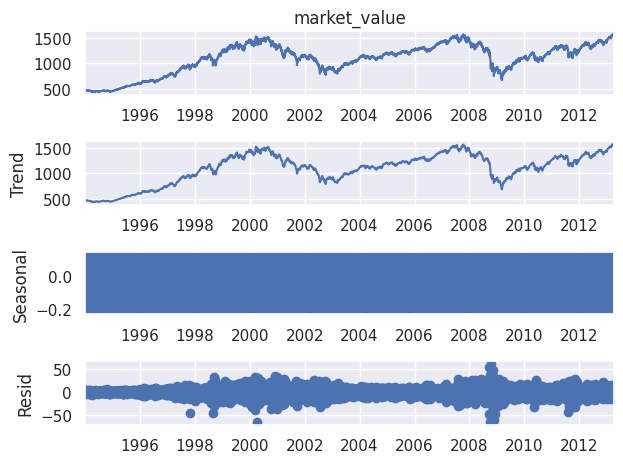

In [18]:
#Descomposición clasica: Aditiva
s_dec_additive = seasonal_decompose(df_.market_value, model="additive")
s_dec_additive.plot()
plt.show()

#1er Grafico: Valores de tiempo observados sin descomponer
#2do Tren: Efecto de tendencia, 3ro Seasonal: Estacionalidad, 4to Resid: Residuales
#Tren: parecida a observada ya que la función utiliza los valores del periodo anterior como un 
#marcador de tendencia (precio presente es el mejor predictor para periodos siguientes)
#Si hay estacionalidad no se cumpliria lo anterior porque podrian haber mejores predictores
#Tren explica la mayor parte de la variabilidad de los datos.

#El componente estacional se parece a un rectangulo: 
#Esto sucede cuando los valores estan oscilando constantemente de un lado a otro
#entre 0.0 y 0.2 rebota entre estos dos valores por lo tanto no hay un patron ciclico concreto

#Residuos son los errores de las estimaciones del modelo, diferencia entre los valores verdaderos 
#y los de predicción para cualquier periodo, varian bastante alrededor del cambio del siglo
#y del año 2008, explicado por la inestabilidad causada por .com y burbujas inmobiliarias

#En general los datos de las descomposición aditiva sugiere que no hay estacionalidad en los datos



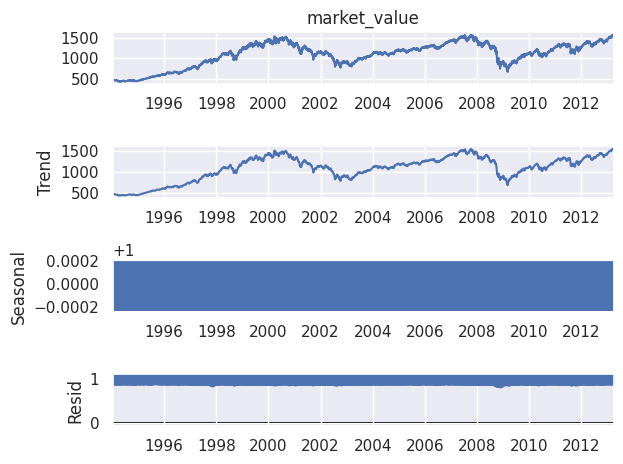

In [20]:
#Descomposición clasica: Multiplicativa
s_dec_multiplicative = seasonal_decompose(df_.market_value, model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

#No hay patron claro en la estacionalidad, y la tendencia es similar a la observada
#Por lo tanto no hay estacionalidad en los precios del S&P500
